 Περιγραφή του Dataset
Περιεχόμενο: Το dataset περιλαμβάνει εγγραφές ECG από ασθενείς. Κάθε γραμμή αντιστοιχεί σε ένα πλήρες ECG ενός ασθενούς.

Δομή: Κάθε ECG αποτελείται από 140 σημεία δεδομένων, που αντιπροσωπεύουν την ηλεκτρική δραστηριότητα της καρδιάς σε μια χρονική περίοδο.

Ετικέτες: Το dataset περιλαμβάνει ετικέτες που υποδεικνύουν αν το ECG είναι φυσιολογικό ή αν παρουσιάζει ανωμαλίες.
Kaggle

📁 Δομή των Δεδομένων
Το dataset είναι διαθέσιμο σε μορφή CSV, όπου κάθε γραμμή περιέχει:

140 στήλες: Αντιστοιχούν στα σημεία δεδομένων του ECG.

1 στήλη ετικέτας: Υποδεικνύει την κατηγορία του ECG (π.χ., φυσιολογικό ή ανώμαλο).

Αυτή η δομή επιτρέπει την εφαρμογή τεχνικών μηχανικής μάθησης για την ανάλυση και πρόβλεψη των ECG σημάτων.

🧪 Πιθανές Εφαρμογές
Ανίχνευση ανωμαλιών: Χρήση autoencoders για την ανίχνευση μη φυσιολογικών ECG.

Πρόβλεψη σειρών χρόνου: Χρήση μοντέλων όπως LSTM για την πρόβλεψη μελλοντικών σημείων του ECG.

Ταξινόμηση: Κατηγοριοποίηση των ECG σε φυσιολογικά και ανώμαλα.



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ecg-timeseries-for-prediction/ecg_1d_timeseries_prediction.csv


In [2]:
file_path = '/kaggle/input/ecg-timeseries-for-prediction/ecg_1d_timeseries_prediction.csv'

In [5]:
df = pd.read_csv('/kaggle/input/ecg-timeseries-for-prediction/ecg_1d_timeseries_prediction.csv')



In [6]:
df.head()

,time;ecg_value
0,0.0;496
1,0.001;496
2,0.002;497
3,0.003;498
4,0.004;498


In [8]:
df.isnull().sum()

time;ecg_value    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17935 entries, 0 to 17934
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time;ecg_value  17935 non-null  object
dtypes: object(1)
memory usage: 140.2+ KB


In [10]:
df.describe()

,time;ecg_value
count,17935
unique,17935
top,0.0;496
freq,1


In [13]:
df.columns


Index(['time;ecg_value'], dtype='object')

In [14]:
df.head()            # Πρώτες 5 γραμμές
df.tail()            # Τελευταίες 5 γραμμές
df.shape             # Διαστάσεις (πλήθος γραμμών και στηλών)
df.info()            # Πληροφορίες για κάθε στήλη (τύπος δεδομένων, nulls)
df.describe()        # Στατιστικά στοιχεία (μέσος, std, min, max κ.λπ.)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17935 entries, 0 to 17934
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   time;ecg_value  17935 non-null  object
dtypes: object(1)
memory usage: 140.2+ KB


,time;ecg_value
count,17935
unique,17935
top,0.0;496
freq,1


In [16]:
df.columns           # Λίστα με τα ονόματα των στηλών
list(df.columns)     # Μετατροπή σε λίστα



['time;ecg_value']

In [18]:
df = pd.read_csv('/kaggle/input/ecg-timeseries-for-prediction/ecg_1d_timeseries_prediction.csv', delimiter=';')


In [21]:
print(df.columns)
df.head()


Index(['time', 'ecg_value'], dtype='object')


,time,ecg_value
0,0.000,496
1,0.001,496
2,0.002,497
3,0.003,498
4,0.004,498


In [22]:


df['time'].value_counts()    # Πλήθος για κάθε κατηγορία στην ετικέτα
df.dtypes                     # Τύπος κάθε στήλης


time         float64
ecg_value      int64
dtype: object

In [23]:
df['time'] = pd.to_numeric(df['time'], errors='coerce')
df['ecg_value'] = pd.to_numeric(df['ecg_value'], errors='coerce')

# Drop rows with any missing or coerced-to-NaN values
df.dropna(inplace=True)

print("After cleaning, DataFrame shape:", df.shape)

After cleaning, DataFrame shape: (17935, 2)


In [24]:
df.isnull().sum()     # Πόσα missing values έχει κάθε στήλη
df.duplicated().sum() # Πόσες διπλότυπες γραμμές υπάρχουν


0

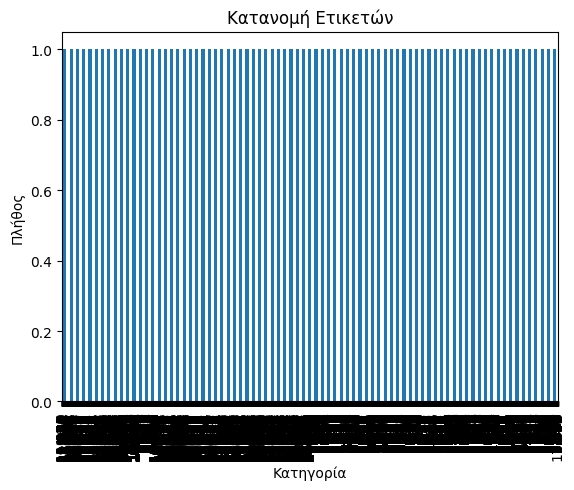

In [25]:
import matplotlib.pyplot as plt

df['time'].value_counts().plot(kind='bar')
plt.title('Κατανομή Ετικετών')
plt.xlabel('Κατηγορία')
plt.ylabel('Πλήθος')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


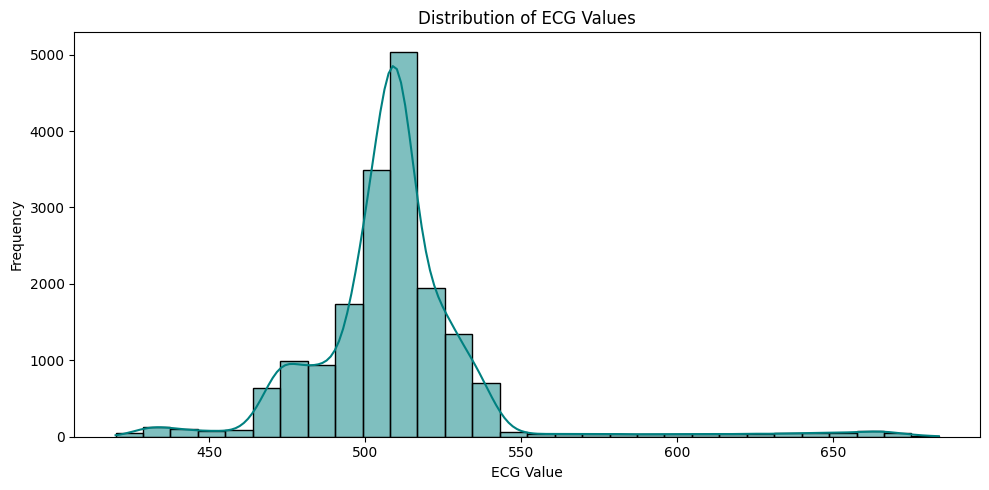

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


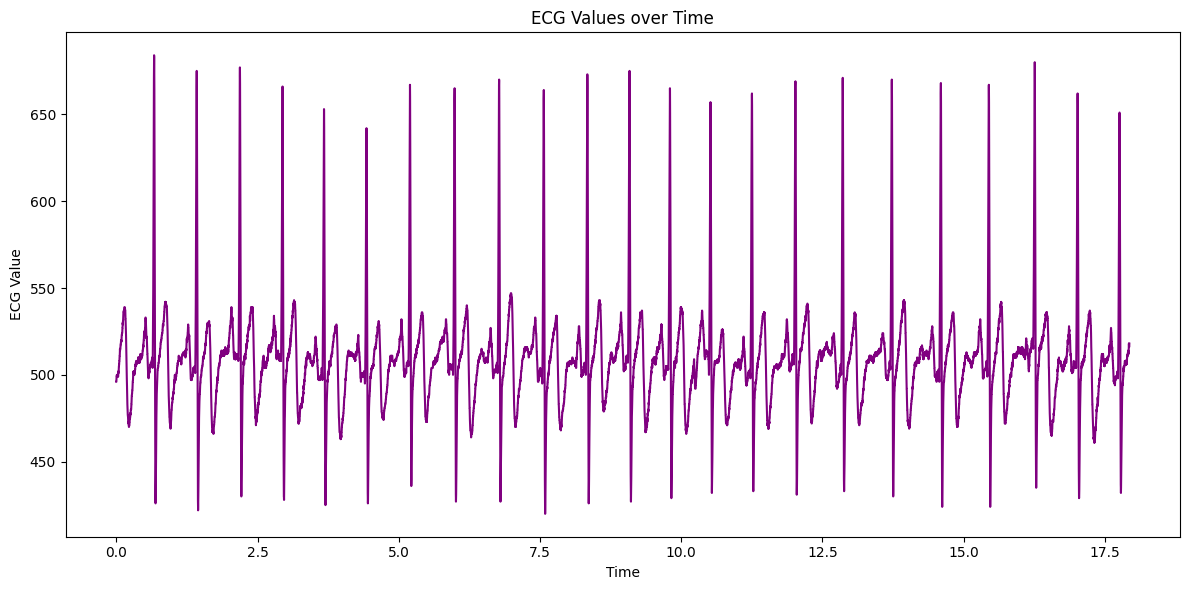

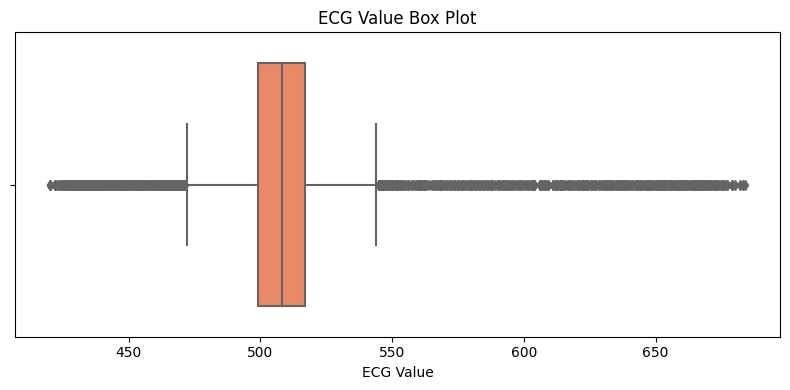

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ιστόγραμμα με KDE
plt.figure(figsize=(10, 5))
sns.histplot(df['ecg_value'], bins=30, kde=True, color='teal')
plt.title('Distribution of ECG Values')
plt.xlabel('ECG Value')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Γραμμικό διάγραμμα ECG σε συνάρτηση του χρόνου
plt.figure(figsize=(12, 6))
sns.lineplot(x='time', y='ecg_value', data=df, color='purple')
plt.title('ECG Values over Time')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.tight_layout()
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['ecg_value'], color='coral')
plt.title('ECG Value Box Plot')
plt.xlabel('ECG Value')
plt.tight_layout()
plt.show()  # <== Χωρίς τελεία!


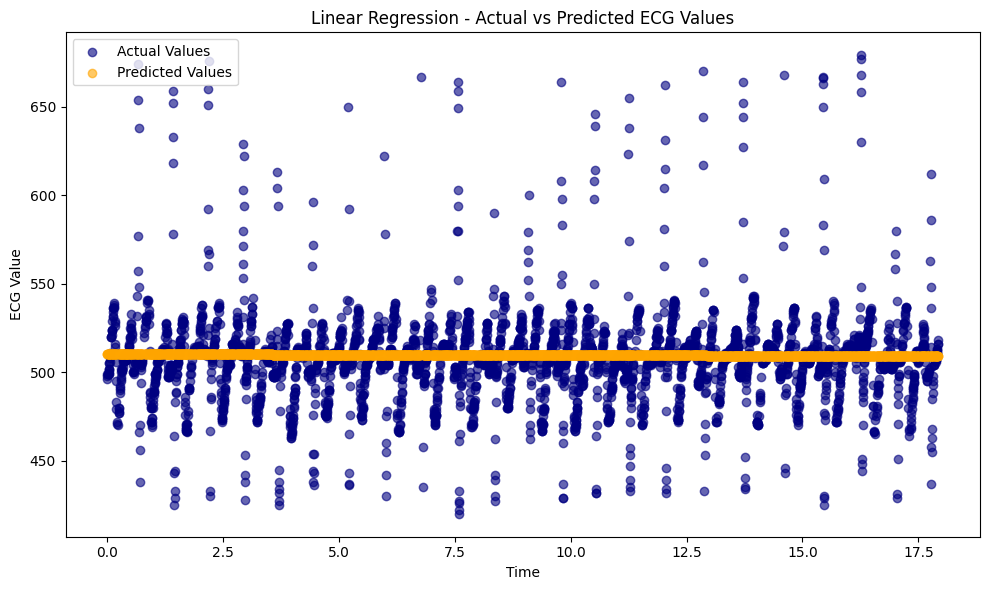

Model: Linear Regression
R^2 Score: -0.0046
Mean Squared Error: 701.8408



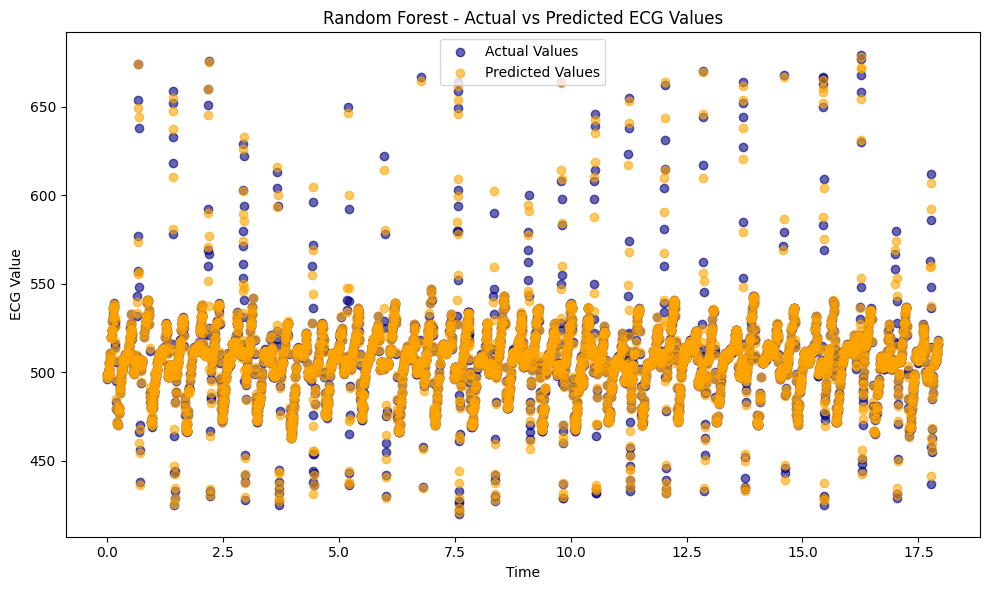

Model: Random Forest
R^2 Score: 0.9962
Mean Squared Error: 2.6831



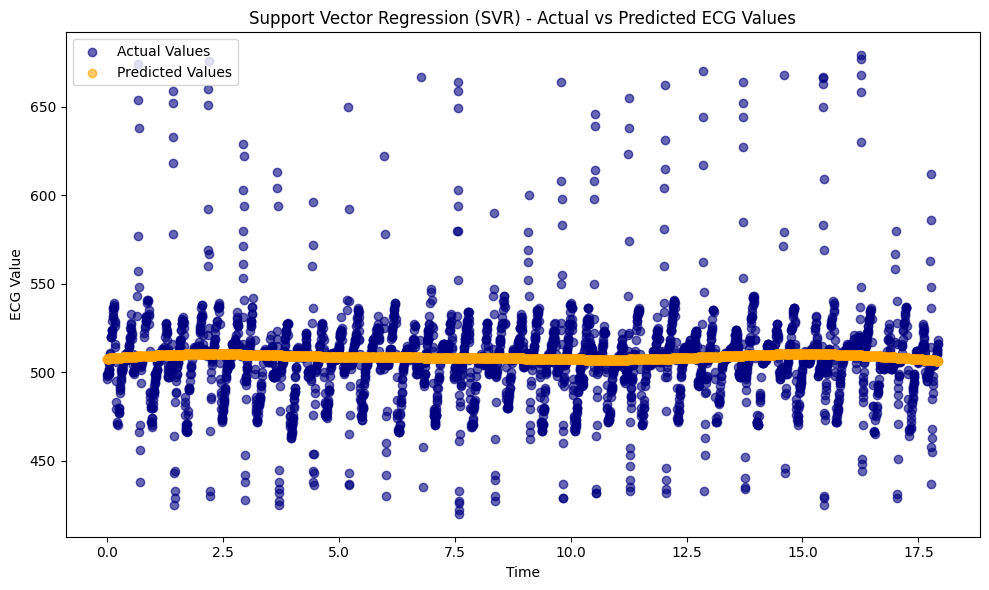

Model: Support Vector Regression (SVR)
R^2 Score: -0.0002
Mean Squared Error: 698.7762



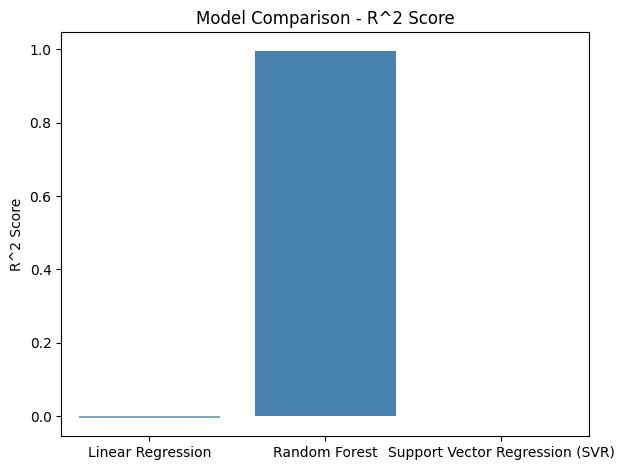

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


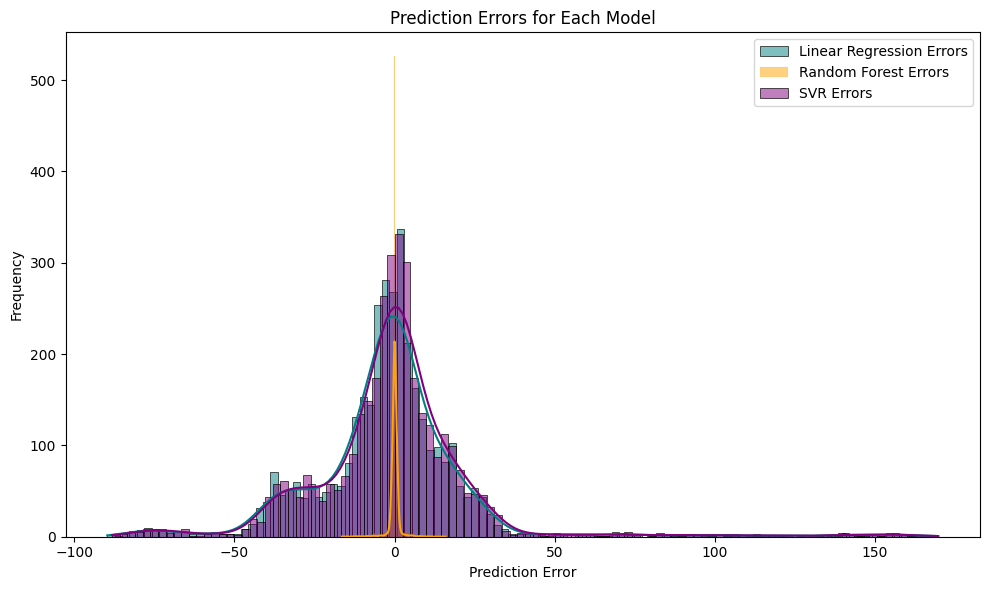

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Προετοιμασία των δεδομένων
X = df[['time']].values
y = df['ecg_value'].values

# Διαχωρισμός σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Δημιουργία και εκπαίδευση διαφορετικών μοντέλων
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression (SVR)': SVR(kernel='rbf')
}

# Αποθήκευση των αποτελεσμάτων για σύγκριση
results = {}

# Εκπαίδευση και πρόβλεψη με κάθε μοντέλο
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Υπολογισμός MSE και R^2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MSE': mse,
        'R^2': r2,
        'Predictions': y_pred
    }
    
    # Οπτικοποίηση: Πρόβλεψη vs Πραγματικές τιμές
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test, y_test, color='navy', label='Actual Values', alpha=0.6)
    plt.scatter(X_test, y_pred, color='orange', label='Predicted Values', alpha=0.6)
    plt.title(f'{name} - Actual vs Predicted ECG Values')
    plt.xlabel('Time')
    plt.ylabel('ECG Value')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Εκτύπωση αξιολογήσεων
    print(f"Model: {name}")
    print(f"R^2 Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}\n")

# Σύγκριση των μοντέλων
df_results = pd.DataFrame(results).T
sns.barplot(x=df_results.index, y='R^2', data=df_results, palette="Blues_d")
plt.title('Model Comparison - R^2 Score')
plt.ylabel('R^2 Score')
plt.tight_layout()
plt.show()

# Οπτικοποίηση των σφαλμάτων
plt.figure(figsize=(10, 6))
sns.histplot(y_test - results['Linear Regression']['Predictions'], kde=True, color='teal', label='Linear Regression Errors')
sns.histplot(y_test - results['Random Forest']['Predictions'], kde=True, color='orange', label='Random Forest Errors')
sns.histplot(y_test - results['Support Vector Regression (SVR)']['Predictions'], kde=True, color='purple', label='SVR Errors')
plt.title('Prediction Errors for Each Model')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


2025-05-07 14:57:20.139837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746629840.391826      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746629840.462562      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/10


2025-05-07 14:57:37.433089: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


447/447 ━━━━━━━━━━━━━━━━━━━━ 25s 46ms/step - loss: 0.0067
Epoch 2/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms/step - loss: 1.0476e-04
Epoch 3/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 7.5065e-05
Epoch 4/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - loss: 5.8060e-05
Epoch 5/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 4.9967e-05
Epoch 6/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 22s 49ms/step - loss: 5.3365e-05
Epoch 7/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 4.6579e-05
Epoch 8/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 3.9041e-05
Epoch 9/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 21s 46ms/step - loss: 3.3436e-05
Epoch 10/10
447/447 ━━━━━━━━━━━━━━━━━━━━ 20s 46ms/step - loss: 2.8705e-05
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


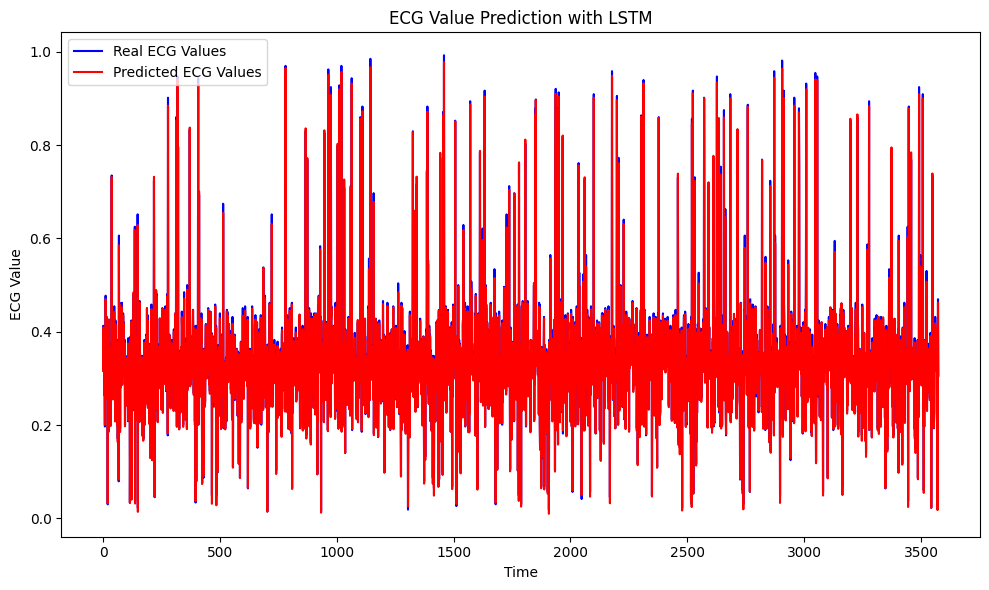

In [35]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Κανονικοποίηση με MinMaxScaler (για LSTM)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df[['ecg_value']])

# Δημιουργία παραθύρων για LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Επιλογή παραθύρου χρόνου (π.χ. 60 χρονικές στιγμές)
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Διαχωρισμός σε train και test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Προσαρμογή για LSTM (reshape για να είναι σε μορφή [samples, time steps, features])
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Δημιουργία LSTM μοντέλου
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

# Εκπαίδευση του μοντέλου
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Πρόβλεψη
y_pred = model.predict(X_test)

# Οπτικοποίηση
plt.figure(figsize=(10, 6))
plt.plot(y_test, color='blue', label='Real ECG Values')
plt.plot(y_pred, color='red', label='Predicted ECG Values')
plt.title('ECG Value Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.tight_layout()
plt.show()


In [37]:
from sklearn.model_selection import cross_val_score

# Cross-validation για το Linear Regression
model = LinearRegression()
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validated R^2: {np.mean(cv_scores):.4f}")


Cross-validated R^2: 0.9992


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")


MAE: 0.0048
RMSE: 0.0062


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


449/449 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 232671.1719 - val_loss: 17674.6523
Epoch 2/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7357.2852 - val_loss: 1432.1554
Epoch 3/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1518.0123 - val_loss: 886.2001
Epoch 4/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1014.9633 - val_loss: 752.4981
Epoch 5/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 904.6593 - val_loss: 722.5323
Epoch 6/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 901.9363 - val_loss: 703.0252
Epoch 7/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 919.3633 - val_loss: 700.3391
Epoch 8/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 866.7984 - val_loss: 702.1558
Epoch 9/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 832.0272 - val_loss: 701.8702
Epoch 10/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 866.6757 - val_loss: 698.8324
Epoch 11/100
449/449 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 867.8892 - val_loss: 699.8474


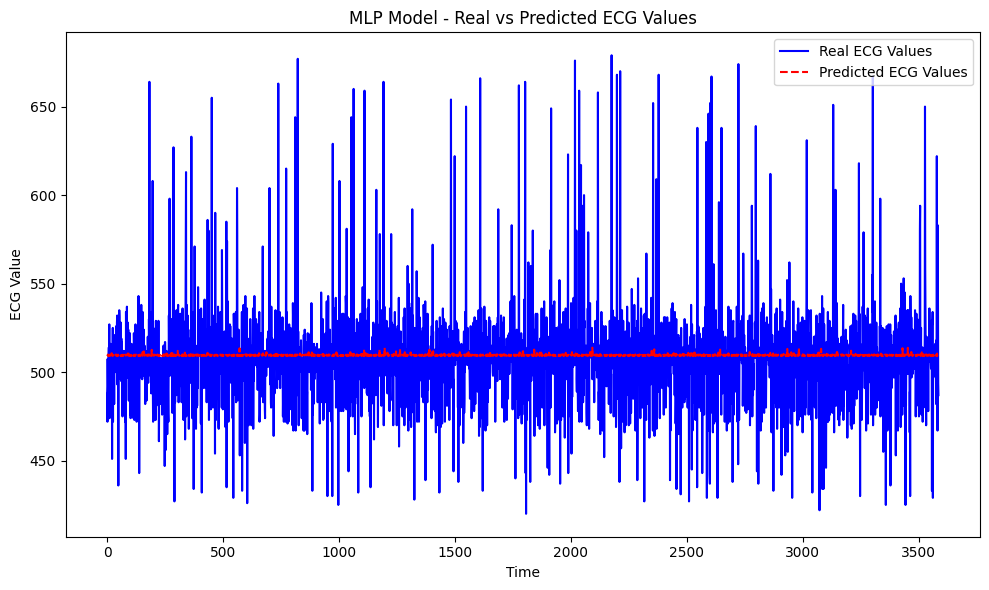

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

# Προετοιμασία δεδομένων
X = df[['time']].values
y = df['ecg_value'].values

# Κανονικοποίηση των δεδομένων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Διαχωρισμός σε training και testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Δημιουργία του νευρωνικού δικτύου (MLP)
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))  # Εισαγωγικό επίπεδο με 64 νευρώνες
model.add(Dense(units=32, activation='relu'))  # Κρυφό επίπεδο με 32 νευρώνες
model.add(Dense(units=1))  # Επίπεδο εξόδου (για πρόβλεψη τιμών ECG)

# Συγκέντρωση και εκπαίδευση του μοντέλου
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Πρόβλεψη με το μοντέλο
y_pred = model.predict(X_test)

# Αξιολόγηση με R^2 score
from sklearn.metrics import r2_score
print(f'R^2 Score: {r2_score(y_test, y_pred):.4f}')

# Οπτικοποίηση των πραγματικών vs προβλεπόμενων τιμών
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Real ECG Values', color='blue')
plt.plot(y_pred, label='Predicted ECG Values', color='red', linestyle='--')
plt.title('MLP Model - Real vs Predicted ECG Values')
plt.xlabel('Time')
plt.ylabel('ECG Value')
plt.legend()
plt.tight_layout()
plt.show()


In [45]:
# Ελέγχουμε το σχήμα των δεδομένων μας
print(X_train.shape)


(14348, 1)


In [46]:
# Αναδιάταξη των δεδομένων για το 1D CNN
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Σχήμα: (num_samples, num_features, 1)
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
